### Telecom Churn

###### Identifying customers with high churn - the Churn rate refers to the proportion of customers who stop availing the service/subscription/company during a given time period.

In [3]:
import os

In [4]:
# check working directory
os.getcwd()

'C:\\Users\\jeeva\\Documents\\Yamuna\\Learning\\Capstone\\Telecom'

##### Load Data File

In [5]:
import pandas as pd 

# Read the dataset
Tele=pd.read_csv('Telcom_Customer.csv')

Tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#view the dataset shape

Tele.shape

(7043, 21)

##### Observations:
##### Dataset has 7043 records

##### There are no duplicate records, no null values, no missing values

#### Descriptive statistics

In [7]:
#view the descriptive statistics of the dataframe
# five point summary of continuous variables

Tele.describe().round()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.0,7043.0,7043.0
mean,0.0,32.0,65.0
std,0.0,25.0,30.0
min,0.0,0.0,18.0
25%,0.0,9.0,36.0
50%,0.0,29.0,70.0
75%,0.0,55.0,90.0
max,1.0,72.0,119.0


###### Observations:

##### Target Variable

No     5174
Yes    1869
Name: Churn, dtype: int64

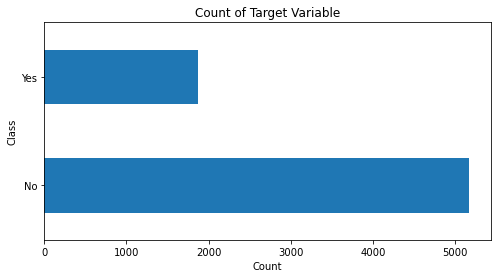

In [8]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(8,4))
Tele["Churn"].value_counts().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Class")
plt.title("Count of Target Variable")

Tele["Churn"].value_counts()

##### Attributes

In [9]:
Tele.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
#view the number of duplicate records in the dataframe

Tele.duplicated().sum()

0

In [11]:
# Attribute dtypes, Missing and Unique values

def Tele_Attributes(Tele):
    '''
    input the dataframe, and it will return a summary table with columns datails.
    '''
    #create a dataframe Telesummary
    Telesummary = pd.DataFrame(Tele.dtypes, columns=['dtype'])

    # Number of Missing values (count)
    Telesummary['num_missing'] = Tele.isna().sum()  

    # Number of unique values by features
    Telesummary['num_uniques'] = Tele.nunique()

    
    return Telesummary

In [12]:
Telesummary = Tele_Attributes(Tele)
Telesummary

,dtype,num_missing,num_uniques
customerID,object,0,7043
gender,object,0,2
SeniorCitizen,int64,0,2
Partner,object,0,2
Dependents,object,0,2
tenure,int64,0,73
PhoneService,object,0,2
MultipleLines,object,0,3
InternetService,object,0,3
OnlineSecurity,object,0,3


In [13]:
print("Unique values of each columns: ")
for col in Tele.columns:
  print(f"{col}: \n{Tele[col].unique()}\n")

Unique values of each columns: 
customerID: 
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: 
['Female' 'Male']

SeniorCitizen: 
[0 1]

Partner: 
['Yes' 'No']

Dependents: 
['No' 'Yes']

tenure: 
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService: 
['No' 'Yes']

MultipleLines: 
['No phone service' 'No' 'Yes']

InternetService: 
['DSL' 'Fiber optic' 'No']

OnlineSecurity: 
['No' 'Yes' 'No internet service']

OnlineBackup: 
['Yes' 'No' 'No internet service']

DeviceProtection: 
['No' 'Yes' 'No internet service']

TechSupport: 
['No' 'Yes' 'No internet service']

StreamingTV: 
['No' 'Yes' 'No internet service']

StreamingMovies: 
['No' 'Yes' 'No internet service']

Contract: 
['Month-to-month' 'One year' 'Two year']

PaperlessBilling: 
['Yes' 'No']

PaymentMet

##### Observations:

### Data Cleaning

In [14]:
Tele_copy = Tele.copy()
Tele_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### TotalCharges - Change datatype 

In [15]:
Tele_copy['TotalCharges'] = pd.to_numeric(Tele_copy['TotalCharges'], errors='coerce')
Telesummary.loc["TotalCharges","dtype"] = "float64"

In [16]:
Tele_Attributes(Tele_copy)

,dtype,num_missing,num_uniques
customerID,object,0,7043
gender,object,0,2
SeniorCitizen,int64,0,2
Partner,object,0,2
Dependents,object,0,2
tenure,int64,0,73
PhoneService,object,0,2
MultipleLines,object,0,3
InternetService,object,0,3
OnlineSecurity,object,0,3


##### Observation:

In [17]:
Tele_copy[Tele_copy["TotalCharges"].isna() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
Tele_copy.dropna(inplace=True)

In [19]:
Telesummary = Tele_Attributes(Tele_copy)
Telesummary

,dtype,num_missing,num_uniques
customerID,object,0,7032
gender,object,0,2
SeniorCitizen,int64,0,2
Partner,object,0,2
Dependents,object,0,2
tenure,int64,0,72
PhoneService,object,0,2
MultipleLines,object,0,3
InternetService,object,0,3
OnlineSecurity,object,0,3


##### Tenure - group

In [20]:
Tele_copy["tenure"].max()

72

In [21]:
labels = [f"{i} - {i+11}" for i in range(1,72,12)]
Tele_copy['tenure_group'] = pd.cut(Tele_copy.tenure, range(1, 80, 12), right=False, labels=labels)

In [22]:
Tele_copy['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [37]:
Tele_copy.drop(columns=["tenure","customerID"],inplace=True)

In [38]:
Tele_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


#### Univariate Analysis

In [39]:
Telesummary

,dtype,num_missing,num_uniques
customerID,object,0,7032
gender,object,0,2
SeniorCitizen,int64,0,2
Partner,object,0,2
Dependents,object,0,2
tenure,int64,0,72
PhoneService,object,0,2
MultipleLines,object,0,3
InternetService,object,0,3
OnlineSecurity,object,0,3


##### Grouping the columns - to analyze number of customers in each category

In [40]:
# Put the columns into groups 
customer_count = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
contract_count = [ 'Contract', 'PaperlessBilling', 'PaymentMethod'] #  'MonthlyCharges', 'TotalCharges' is not catagories col.
phoneser_count = ['PhoneService', 'MultipleLines']
internetser_count = [ 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [41]:
import seaborn as sns

def univariate_plot(categorical_list):
  Tele_categoric = Tele_copy.loc[:, categorical_list]
  for i in categorical_list:
    plt.figure()
    plt.figure(figsize=(9,4))
    sns.countplot(x = i, data = Tele_categoric)
    plt.title(f"Distribution of {i}")
    # plt.xticks(rotation = 45)

<Figure size 432x288 with 0 Axes>

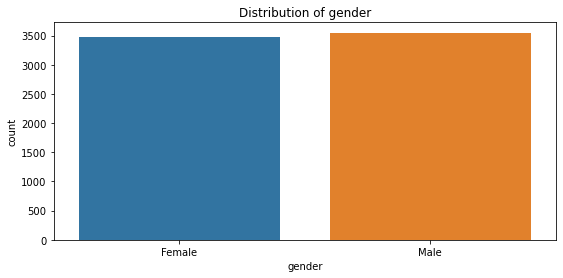

<Figure size 432x288 with 0 Axes>

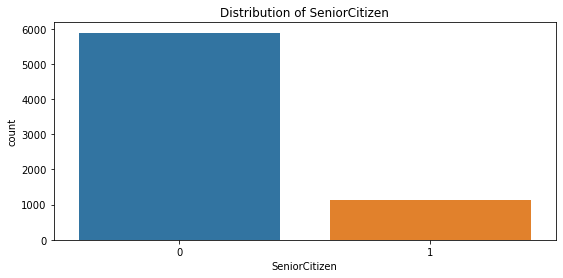

<Figure size 432x288 with 0 Axes>

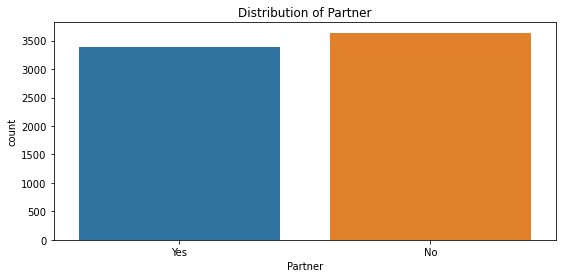

<Figure size 432x288 with 0 Axes>

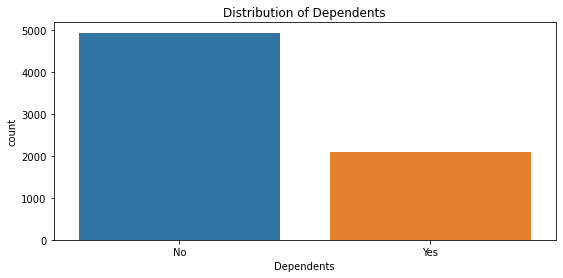

In [42]:
univariate_plot(customer_count)

##### Observation:

<Figure size 432x288 with 0 Axes>

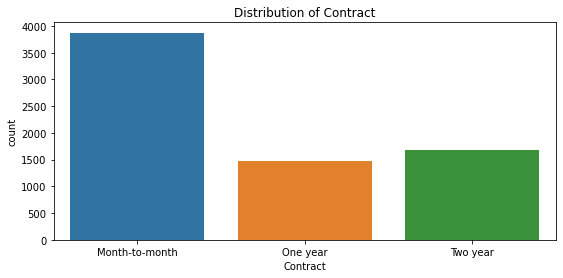

<Figure size 432x288 with 0 Axes>

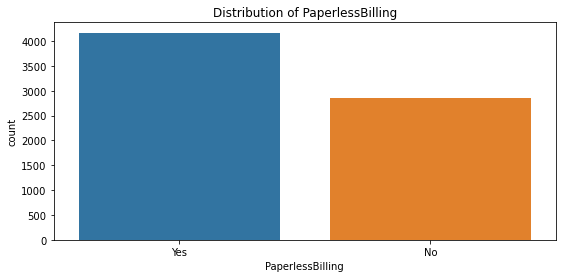

<Figure size 432x288 with 0 Axes>

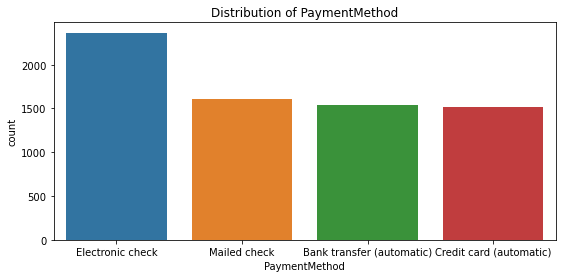

In [43]:
univariate_plot(contract_count)

##### Observations

<Figure size 432x288 with 0 Axes>

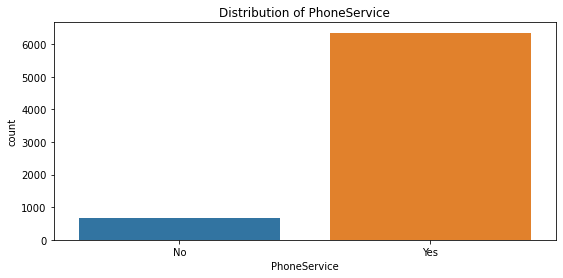

<Figure size 432x288 with 0 Axes>

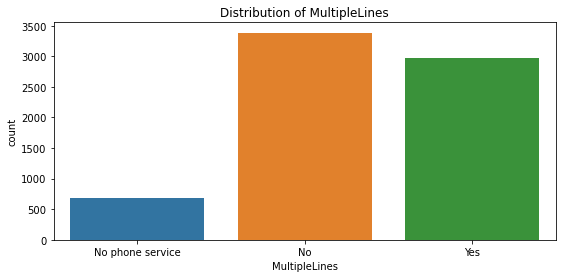

In [44]:
univariate_plot(phoneser_count)

##### Observation

<Figure size 432x288 with 0 Axes>

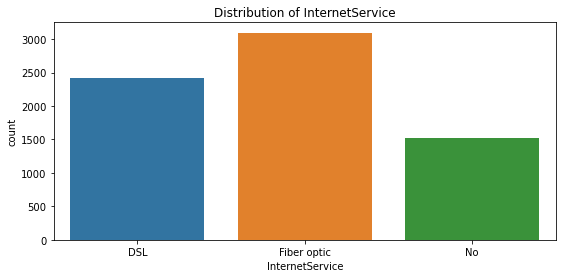

<Figure size 432x288 with 0 Axes>

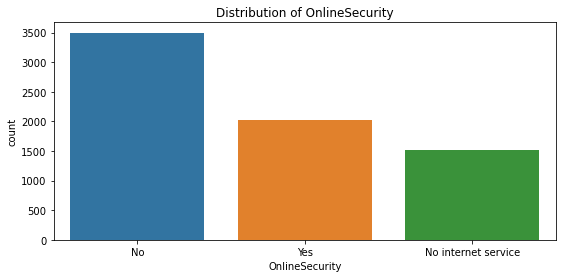

<Figure size 432x288 with 0 Axes>

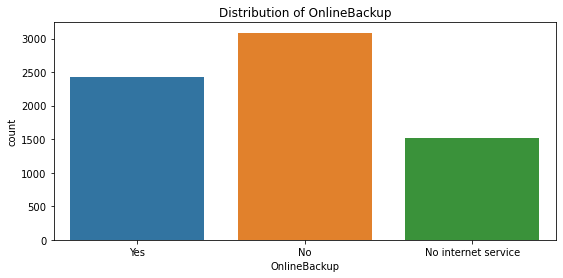

<Figure size 432x288 with 0 Axes>

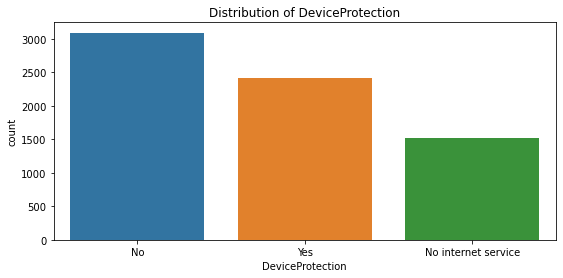

<Figure size 432x288 with 0 Axes>

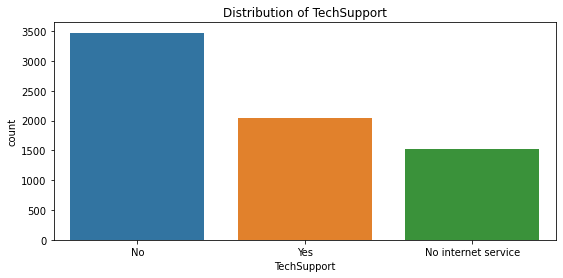

<Figure size 432x288 with 0 Axes>

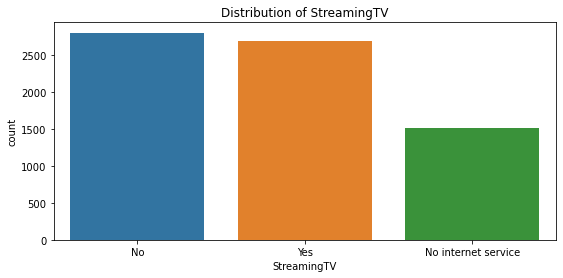

<Figure size 432x288 with 0 Axes>

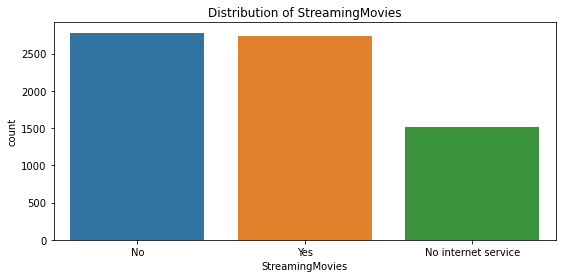

In [45]:
univariate_plot(internetser_count)

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of tenure_group')

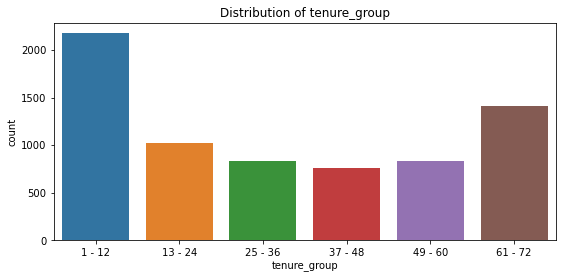

In [46]:
import seaborn as sns

plt.figure(figsize=(9,4))
sns.countplot(Tele_copy['tenure_group'])
plt.title(f"Distribution of tenure_group")

#### Bivariate Analysis

In [47]:
# Put the columns into groups 
customer_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', "Churn"]
contract_col = [ 'Contract', 'PaperlessBilling', 'PaymentMethod', "Churn"] #  'MonthlyCharges', 'TotalCharges' is not catagories col.
phoneser_col = ['PhoneService', 'MultipleLines', "Churn"]
internetser_col = [ 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', "Churn"]


In [48]:
def bivariate_plot(categorical_list):
  Tele_categoric1 = Tele_copy.loc[:, categorical_list]
  for i in categorical_list:
    plt.figure()
    plt.figure(figsize=(9,4))
    sns.countplot(x = i, data = Tele_categoric1, hue = "Churn")
    plt.title(f'{i} in term of CHURN')
    # plt.xticks(rotation = 45)

<Figure size 432x288 with 0 Axes>

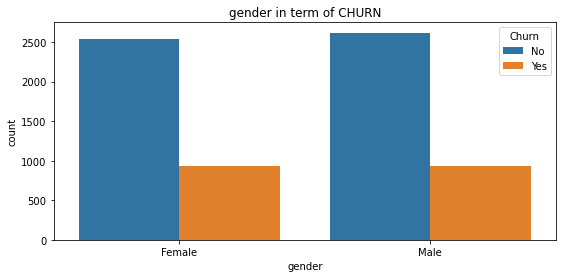

<Figure size 432x288 with 0 Axes>

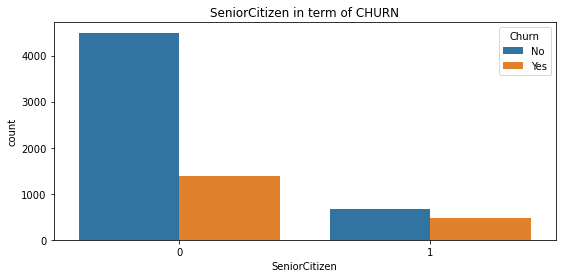

<Figure size 432x288 with 0 Axes>

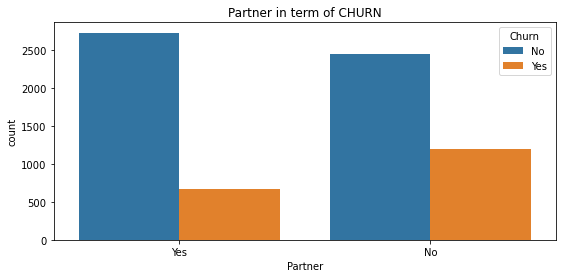

<Figure size 432x288 with 0 Axes>

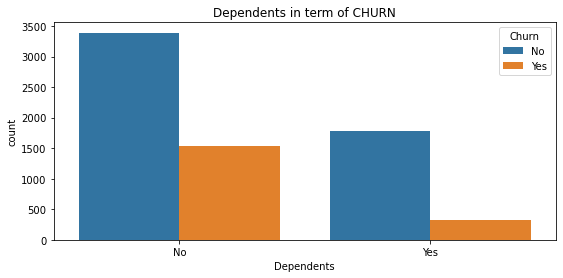

<Figure size 432x288 with 0 Axes>

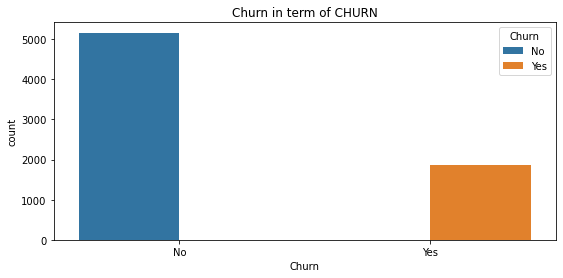

In [49]:
bivariate_plot(customer_col)

##### Observation

<Figure size 432x288 with 0 Axes>

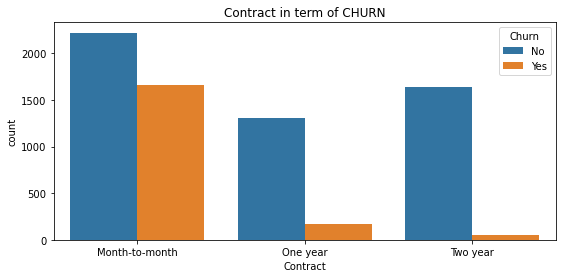

<Figure size 432x288 with 0 Axes>

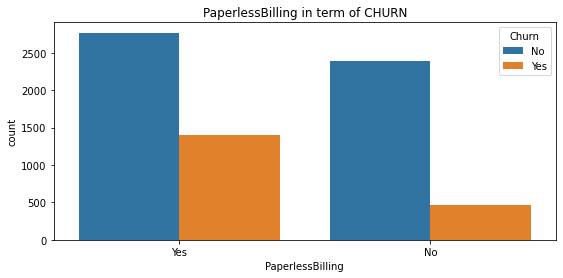

<Figure size 432x288 with 0 Axes>

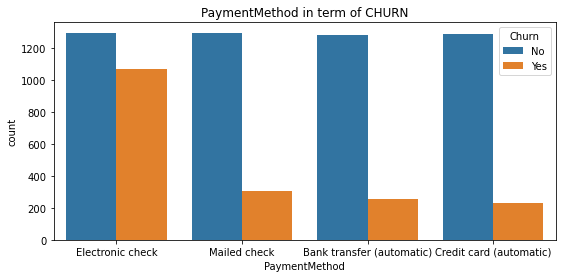

<Figure size 432x288 with 0 Axes>

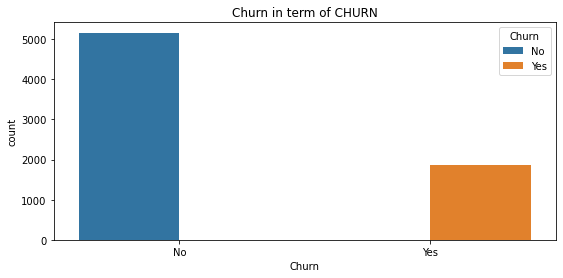

In [50]:
bivariate_plot(contract_col)

##### Observation

<Figure size 432x288 with 0 Axes>

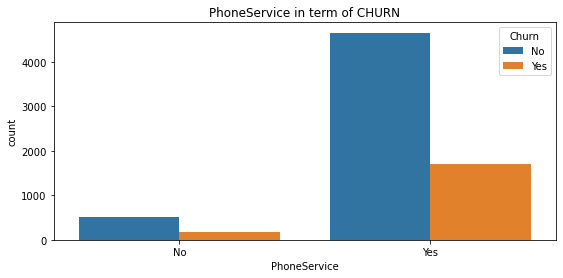

<Figure size 432x288 with 0 Axes>

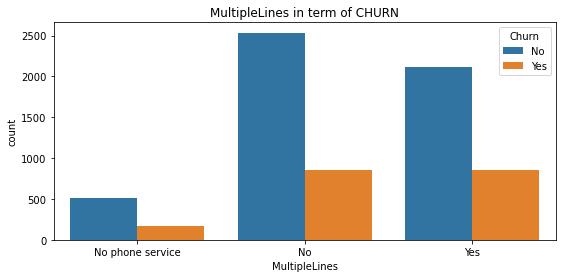

<Figure size 432x288 with 0 Axes>

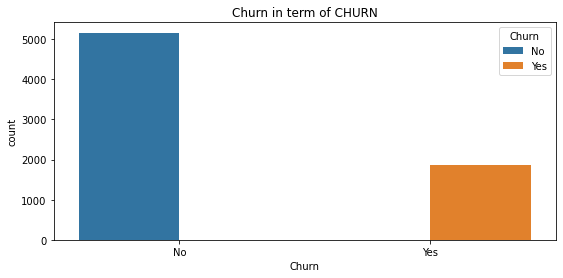

In [51]:
bivariate_plot(phoneser_col)

##### Observation

<Figure size 432x288 with 0 Axes>

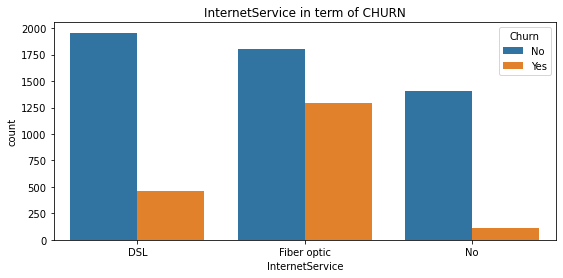

<Figure size 432x288 with 0 Axes>

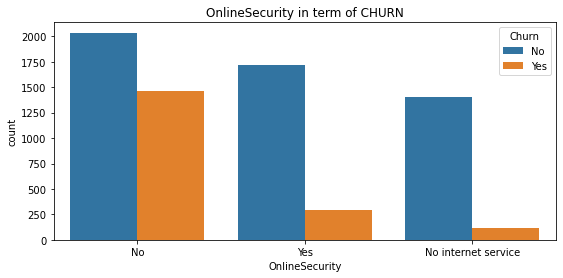

<Figure size 432x288 with 0 Axes>

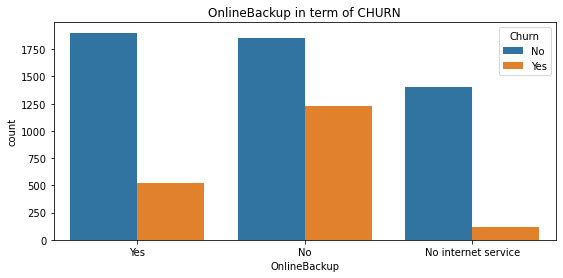

<Figure size 432x288 with 0 Axes>

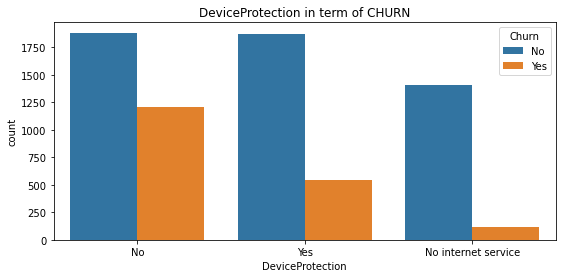

<Figure size 432x288 with 0 Axes>

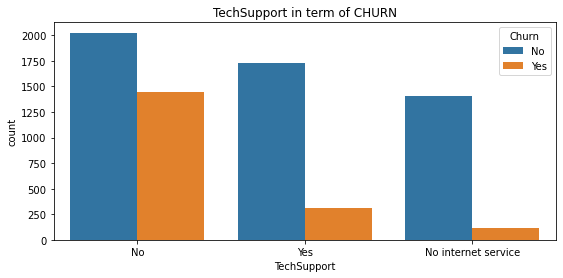

<Figure size 432x288 with 0 Axes>

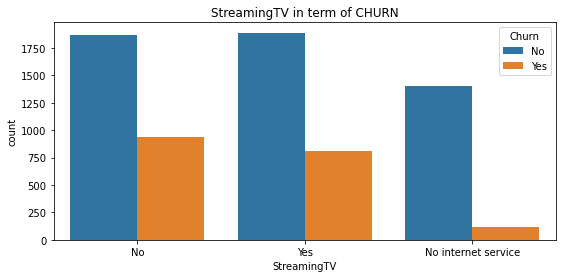

<Figure size 432x288 with 0 Axes>

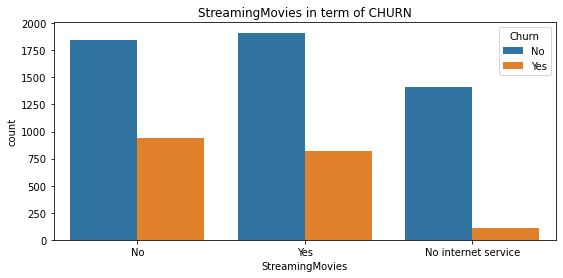

<Figure size 432x288 with 0 Axes>

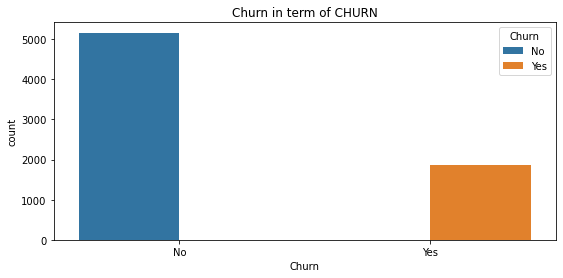

In [52]:
bivariate_plot(internetser_col)

##### Observation

##### Data Converting

In [53]:
# Feature Variables
Tele_copy['gender'] = Tele_copy['gender'].map({"Male":1,"Female":0}).astype("int")
Tele_copy["Partner"] = Tele_copy["Partner"].map({"No":0,"Yes":1}).astype("int")
Tele_copy["Dependents"] = Tele_copy["Dependents"].map({"No":0,"Yes":1}).astype("int")
Tele_copy["PhoneService"] = Tele_copy["PhoneService"].map({"No":0,"Yes":1}).astype("int")
Tele_copy["PaperlessBilling"] = Tele_copy["PaperlessBilling"].map({"No":0,"Yes":1}).astype("int")

In [54]:
# Target variable
Tele_copy["Churn"] = Tele_copy["Churn"].map({"Yes":1, "No":0}).astype("int")

##### Catagorical columns

In [55]:
Tele_dummies = pd.get_dummies(Tele_copy)
Tele_dummies

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,1,0,0,1,29.85,29.85,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,1,0,56.95,1889.50,0,1,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,1,1,53.85,108.15,1,1,...,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,42.30,1840.75,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,70.70,151.65,1,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,84.80,1990.50,0,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,0,1,1,1,1,103.20,7362.90,0,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,0,1,1,0,1,29.60,346.45,0,0,...,0,0,1,0,1,0,0,0,0,0
7041,1,1,1,0,1,1,74.40,306.60,1,0,...,0,0,0,1,1,0,0,0,0,0


##### Distribution of Montly charges by Churn

Text(0.5, 1.0, 'Monthly charges by churn')

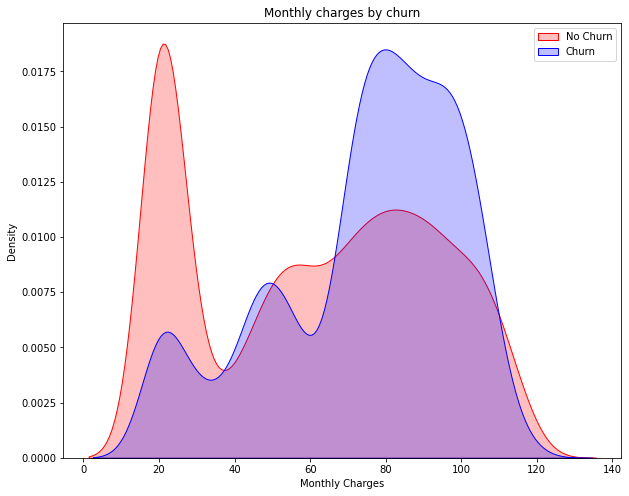

In [56]:
plt.figure(figsize=(10,8))
Mth = sns.kdeplot(Tele_dummies.MonthlyCharges[(Tele_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(Tele_dummies.MonthlyCharges[(Tele_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

##### Observation

##### Distribution of Total charges by churn

Text(0.5, 1.0, 'Total charges by churn')

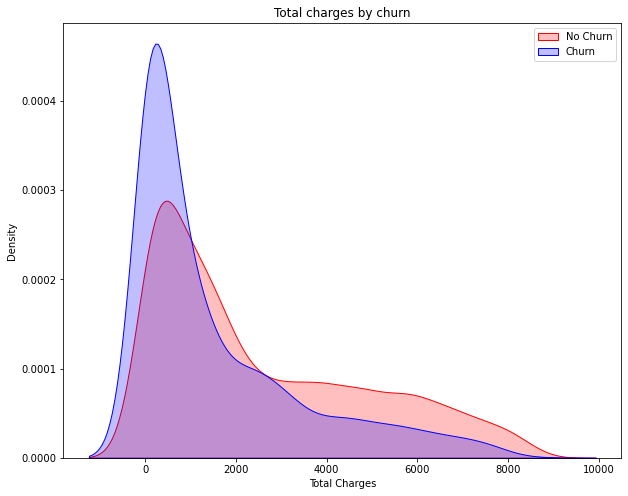

In [57]:
plt.figure(figsize=(10,8))
Tot = sns.kdeplot(Tele_dummies.TotalCharges[(Tele_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(Tele_dummies.TotalCharges[(Tele_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

##### Observations

<AxesSubplot:>

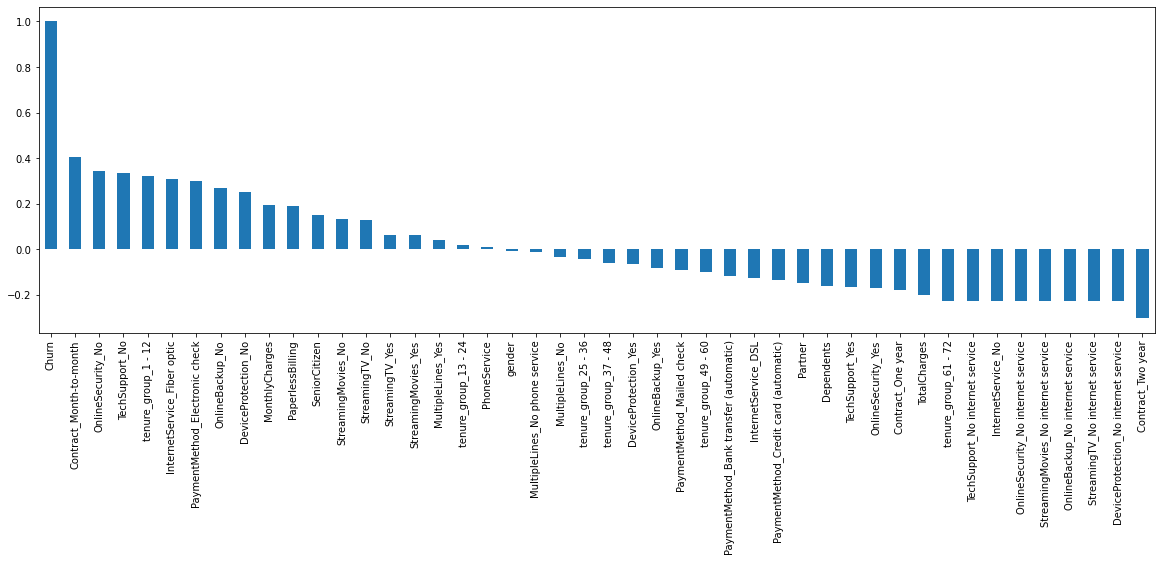

In [58]:
plt.figure(figsize=(20,6))
Tele_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

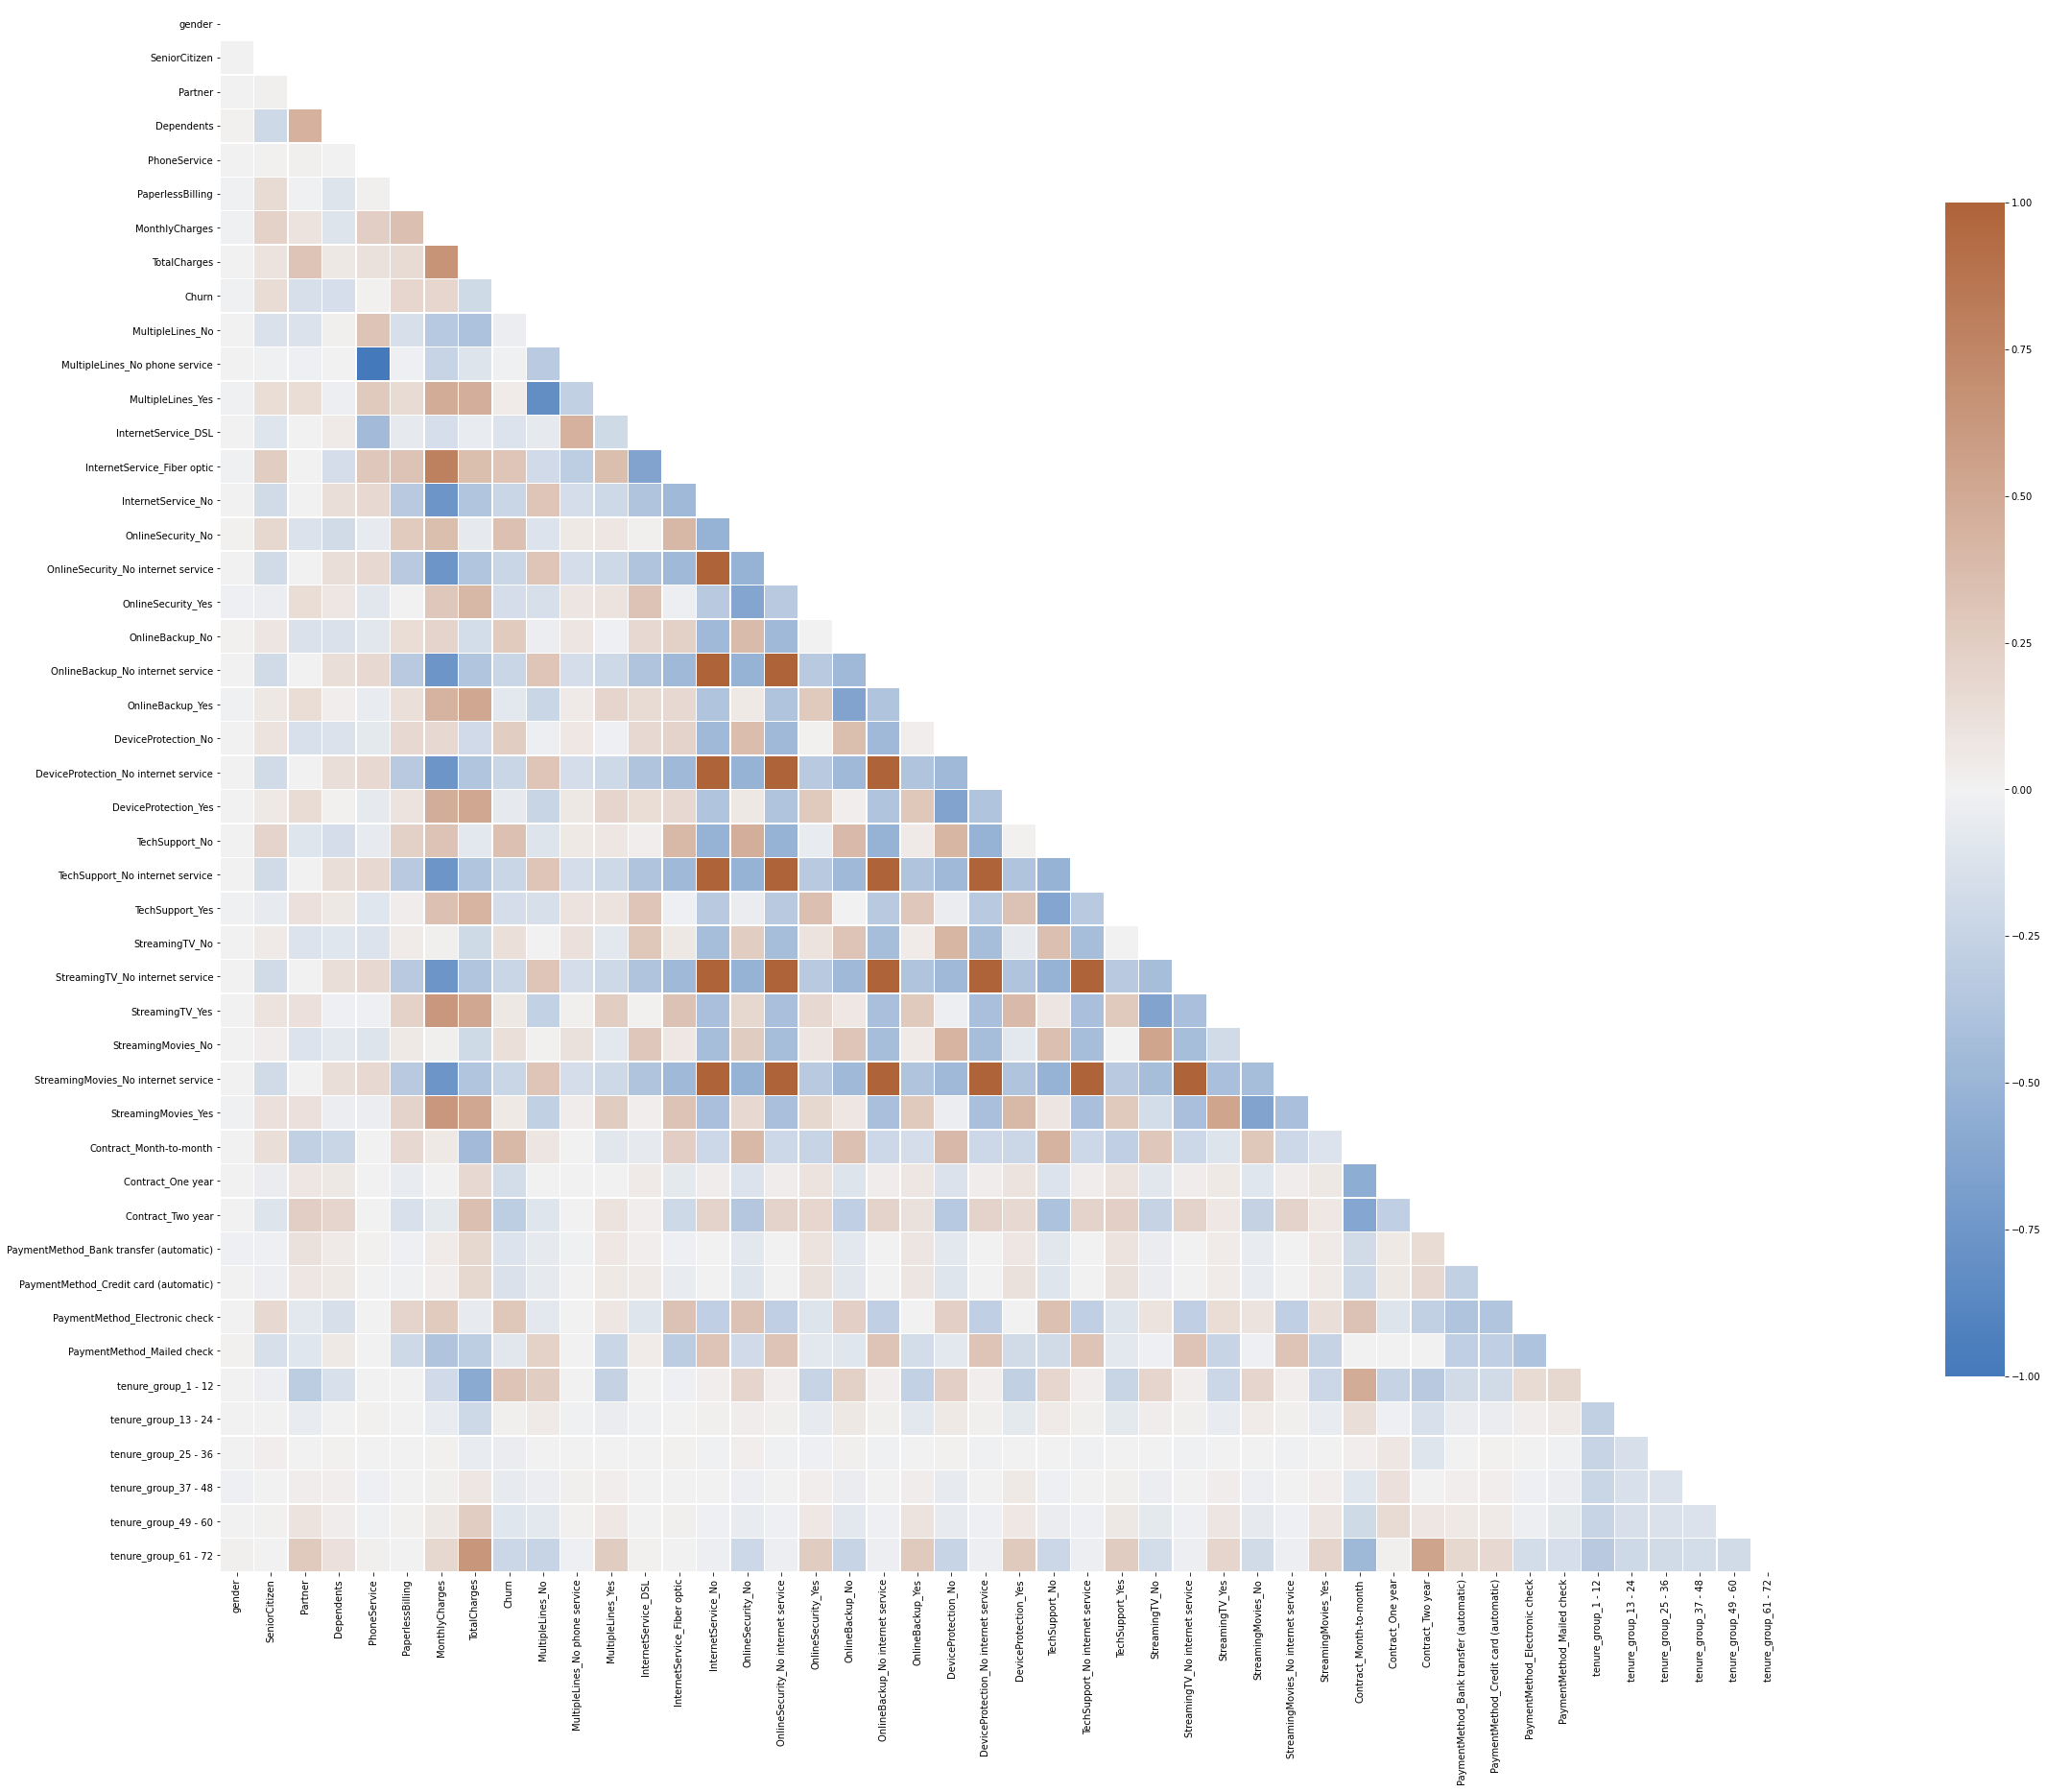

In [66]:
import numpy as np
# resize the figure size
plt.figure(figsize=(60,30))

# calculate the correlations
correlations = Tele_dummies.corr()

# create mask show no duplicate
mask = np.zeros_like(Tele_dummies.corr())
mask[np.triu_indices_from(mask)] = True

# color
cmap = sns.diverging_palette(250, 30, as_cmap=True)

sns.heatmap(correlations, 
            cmap = cmap, 
            vmax = 1.0, 
            mask = mask, # no duplicate
            square = True, 
            linewidths = 0.5, 
            # annot = True, # data
            cbar_kws = {"shrink": .75}) # bar size
    
plt.show()

<AxesSubplot:>

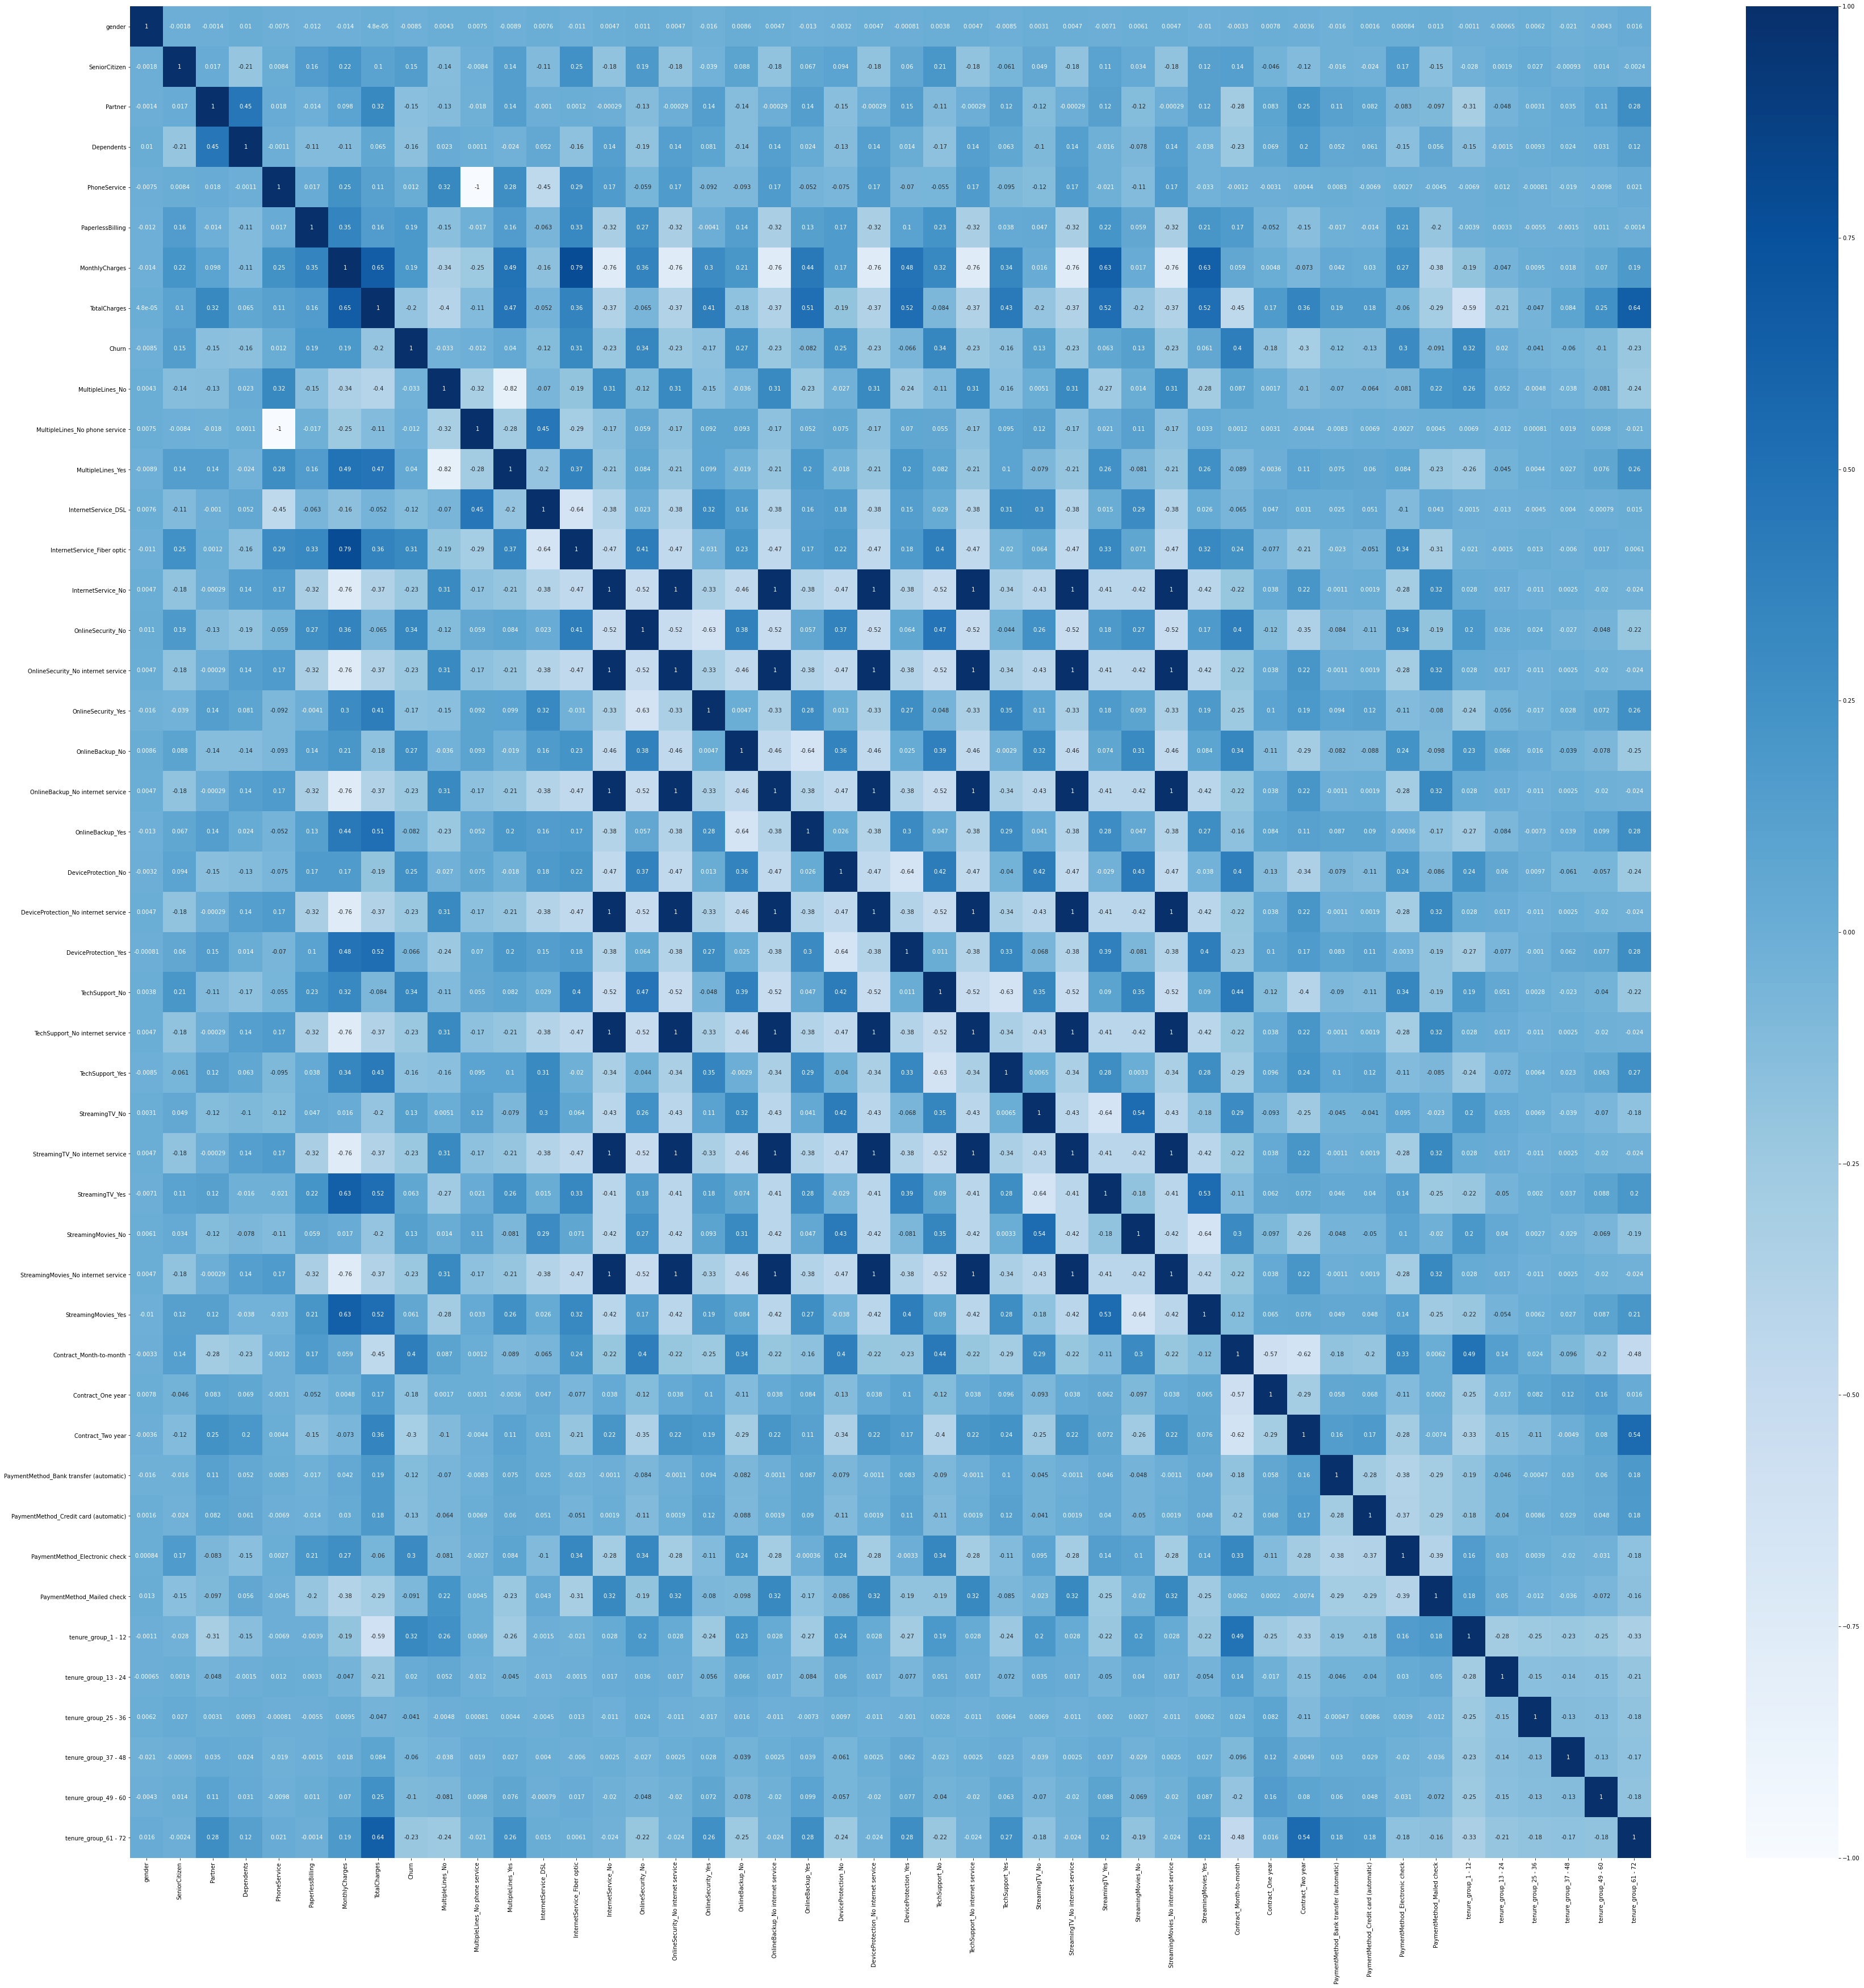

In [70]:
# View the Corelation between all the variables

plt.figure(figsize=(60,60))

colinearity_churn=Tele_dummies.corr()

sns.heatmap(colinearity_churn, annot=True, cmap='Blues' )

##### Data Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
Tele_Data = Tele_dummies.copy()

In [73]:
MMs = MinMaxScaler()
Tele_Data["MonthlyCharges"] = MMs.fit_transform(Tele_Data[["MonthlyCharges"]])

##### Define X and y

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X = Tele_Data.drop(['Churn'], axis=1)
y = Tele_Data["Churn"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=Tele_Data["Churn"])

##### Imbalance Dataset

#### Model Building - Logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()   

In [82]:
# Build model by fitting the training data in logistic regression

lg.fit(X_train, y_train)

C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
# Predict the target by testing the model on the test data

pred=lg.predict(X_test)

In [85]:
# Build a confusion matrix to verify the True Positive, True Negative, False Positive, False Negative values
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix

array([[924, 109],
       [179, 195]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

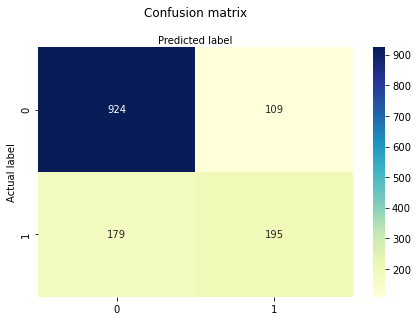

In [86]:
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot = True,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [87]:
# Generate classification report

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
Accuracy = 0.80
Precision = 0.64
Recall = 0.52
F1 score = 0.58

##### ROC-AUC Curve

In [88]:
# Generate probability value for the test data
prob=lg.predict_proba(X_test)
prob

array([[0.96823904, 0.03176096],
       [0.34852851, 0.65147149],
       [0.97094305, 0.02905695],
       ...,
       [0.88634166, 0.11365834],
       [0.95027126, 0.04972874],
       [0.97923554, 0.02076446]])

In [90]:
# probability of 1

prob_1=prob[:,1]

In [91]:
fpr,tpr,_= roc_curve(y_test,prob_1)

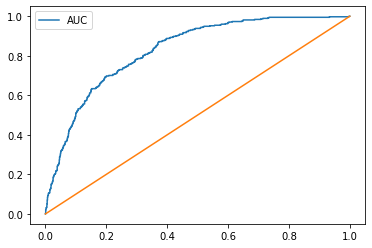

In [92]:
# View the Area Under the curve, plot using false positive rate and true positive rate

plt.plot(fpr,tpr, label='AUC')
plt.plot([0,1],[0,1])
plt.legend()

In [96]:
print(f"Logistic Model base score: {lg.score(X_test, y_test):.4}\n")
print(f"Logistic Model base ROC_AUC score: {roc_auc_score(y_test,pred):.4}\n")


Logistic Model base score: 0.7953

Logistic Model base ROC_AUC score: 0.7079



##### Model Building - Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import *

In [98]:
base_rf = RandomForestClassifier(n_estimators=200, random_state = 100)
base_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=100)

In [99]:
y_pred = base_rf.predict(X_test)

In [101]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[913, 120],
       [191, 183]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

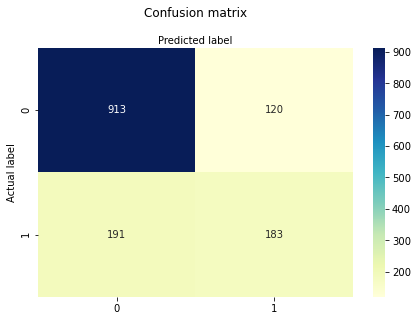

In [103]:
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot = True,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [106]:
print(f"Random forest Model base score: {base_rf.score(X_test, y_test):.4}\n")
print(f"Random forest Model base ROC_AUC score: {roc_auc_score(y_test,y_pred):.4}\n")
print(classification_report(y_test, y_pred, labels=[0,1]))

Random forest Model base score: 0.779

Random forest Model base ROC_AUC score: 0.6866

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



##### Feature selection

In [108]:
# Find the Varibles of importance in the dataset using RFE function
from sklearn.feature_selection import RFE

m=RFE(estimator=lg,n_features_to_select=1)

In [110]:
# Fit the training dataset in the RFE model

m.fit(X_train,y_train)

C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [111]:
# View the Ranking of the features(columns/variables) in the data set

m.ranking_

array([42, 18, 38, 14, 33, 12, 36, 45,  7, 19, 34, 16,  3, 15,  5, 22, 23,
       17, 25, 41, 40, 27, 39, 10, 32, 26, 31, 24,  9, 35, 30, 13,  1, 43,
        2, 28, 37,  6, 44,  4,  8, 21, 29, 20, 11])

In [112]:
# View the Column names in the training dataset

X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (auto

In [113]:
# View the Ranking and Column names

Ranking_CVD=pd.DataFrame(m.ranking_, X_train.columns)
Ranking_CVD.columns = {'Ranking'}
Ranking_CVD

,Ranking
gender,42
SeniorCitizen,18
Partner,38
Dependents,14
PhoneService,33
PaperlessBilling,12
MonthlyCharges,36
TotalCharges,45
MultipleLines_No,7
MultipleLines_No phone service,19
